<a href="https://colab.research.google.com/github/HWMV/Machine_Learning/blob/main/Machine_learning7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 자연어 처리기초**
* 형태소 분석
* 어휘 사전 구축(벡터화)


* 자연어 처리 방법
  * CountVectorizer
    * 각 문장에서 단어 출현 횟수를 카운팅 하는 방법 (BOW, Bag Of word)
  * TfidfVectorizer
    * 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법

**형태소 분석기**
* konlpy : 한국어 처리를 위한 형태소 분석기
* 형태소 : 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위



In [2]:
# 라이브러리 불러오기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# konlpy 설치
!pip install konlpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 44.1 MB/s eta 0:00:00


In [4]:
# 라이브러리 불러오기 (okt)
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [5]:
# 토큰화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [6]:
# 토큰화 (명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [7]:
# 토큰화 (품사 태깅)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

**CountVectorizer**

In [10]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [11]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(text)

In [12]:
# 데이터 학습
vect.fit(words)

CountVectorizer()

In [13]:
# 학습된 어휘 확인
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [14]:
# 단어 사전
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [15]:
# 단어 사전 크기
len(vect.vocabulary_)

7

In [18]:
# 인코딩
df_t = vect.transform(words)

In [19]:
# 인코딩 된 데이터 Maxtrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [21]:
# 어휘와 피처 (데이터 프레임)
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [22]:
# test
test = "AI 공부하며 함께 성장해요!"

In [23]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(test)

In [24]:
# 인코딩 된 데이터 Matrix
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [25]:
# 어휘와 피처 (데이터 프레임)
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


**TfidfVectorizer**

In [26]:
# tr-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
# tf=idf 활용 어휘 사전 구축
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [32]:
# 인코딩 된 데이터 Matrix
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

**2. 감성 분석**

* 문제정의 > 탐색적 데이터 분석(EDA) > 데이터 전처리 > 모델 학습 > 예측

* 위 과정 중 데이터 전처리 과정
(토큰화, 어휘 사전 구축, 인코딩)

In [36]:
# 라이브러리 불러오기
import pandas as pd

In [38]:
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")


**EDA 및 데이터 전처리**

In [39]:
# 데이터 샘플
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [40]:
# 데이터 크기
df.shape

(150000, 3)

In [42]:
# 타겟 확인
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [43]:
# 결측치
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [45]:
# 결측치 삭제 (5개짜리)
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [46]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

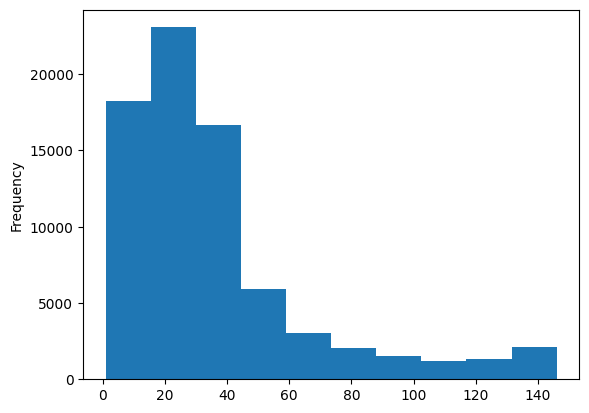

In [48]:
# len 시각화 (label == 0)
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

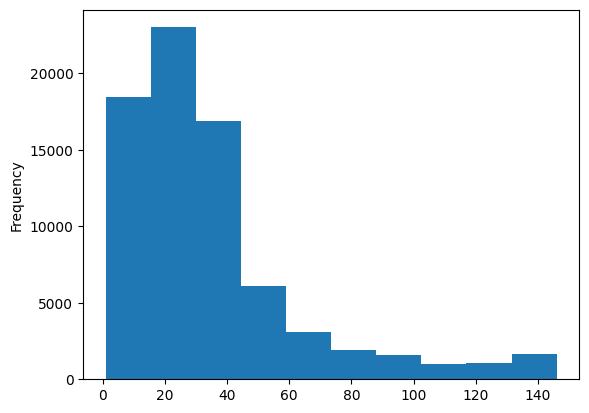

In [49]:
# len 시각화 (label == 1)
df[df.label==1]['len'].plot(kind='hist')

In [50]:
# 데이터 샘플링 df[:1000] : 1000개의 데이터만
df = df[:1000]
df.shape

(1000, 4)

In [53]:
# 토큰화 (하이퍼 파라미터, 인코딩까지 완료 시키기)
vect = CountVectorizer(tokenizer = tokenizer.morphs)  # tokenizer에 Okt 저장되어 있음
vectors = vect.fit_transform(df['document'])

**머신러닝**

In [62]:
# 머신러닝 > 교차검증(f1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6634352457852256